## Problem

Construct a power curve for the $\alpha = 0.05$ test of $H_0: \mu = 60$ vs $H_1: \mu \neq 60$ if the data consist of a random sample of size $16$ from a normal distribution having $\sigma = 4$

## Solution

First, we have to figure out the critical values:

\begin{align*}
   P(~\text{reject $H_0$ | $H_0$ is true}) &= \alpha = 0.05 \\
   & = 2P(\bar{Y} \geq \bar{y}_{u}^* ~|~ \mu = 60) \\
   & = 2P(Z \geq \frac{\bar{y}_{u}^* -60}{ 4 / \sqrt{16}})
\end{align*}

which means

$$\frac{\bar{y}_{u}^* -60}{ 4 / \sqrt{16}} = 1.96 \quad  \bar{y}_{u}^* = 61.96$$

Similarly, we could get $\bar{y}_{l}^* = 58.04$. Now, Suppose the true mean is $x$, then the power of the test is defined as 

\begin{align*}
   1- \beta &=  P(~\text{reject $H_0$ | $H_0$ is false})\\
   & = P(~\text{reject $H_0$ | $\mu = x$ }) \\
   & = P(\bar{Y} \geq 61.96~ ~|~ \mu = x) + P(\bar{Y} \leq 58.04 ~|~ \mu = x) \\
   & = P(Z \geq \frac{61.96 -60}{ 4 / \sqrt{16}}) + P(Z \leq \frac{58.04 -60}{ 4 / \sqrt{16}})
\end{align*}

Now we can express this equation in Python, so that we may plot the power curve

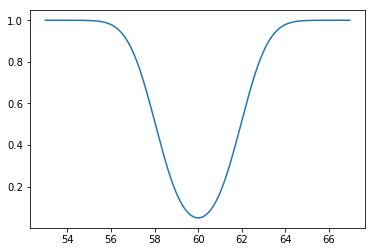

In [11]:
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

def power_curve(x: float, x_upper: float, x_lower: float, sigma: float, n: int):
    """
    x is the true $\mu$
    """
    left_z_score = (x_lower - x) / (sigma / math.sqrt(n))
    right_z_core = (x_upper - x) / (sigma / math.sqrt(n))
    normal = scipy.stats.norm(0, 1)
    
    return normal.cdf(left_z_score) + normal.cdf(-right_z_core)

x = np.arange(53, 67, 0.05) # x range from 56 to 62, with step of 0.05
y = [power_curve(item, 61.96, 58.04, 4, 16) for item in x]

plt.plot(x, y) 